# Demonstrations of `soundlevel`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

from soundlevel import (
    FREQUENCY,
    TOLERANCE,
    calc_db,
    minimum_fs,
    torelance_standard,
    weight_wave,
    zpk_s_weighting,
    zpk_z_weighting
)

## IEC 61672-1 and ANSI S.1-43

[1] American National Standards Institute, “ANSI S1.43: Specifications for Integrating-averaging Sound Level Meters,” Acoustical Society of America, 1997.  
[2] International Electrotechnical Commission, “Electroacoustics: Sound Level Meters. Specifications. Part 1,” International Electrotechnical Commission, 2013.

In [2]:
TOLERANCE

,Frequency,A,B,C,Z,IEC1_upper,IEC1_lower,IEC2_upper,IEC2_lower,ANSI0_upper,ANSI0_lower,ANSI1_upper,ANSI1_lower,ANSI2_upper,ANSI2_lower
0,10.0,-70.4,-38.2,-14.3,0.0,3.0,-inf,5.0,-inf,2.0,-5.0,4.0,-4.0,5.0,-inf
1,12.5,-63.4,-33.2,-11.2,0.0,2.5,-inf,5.0,-inf,2.0,-4.0,3.5,-3.5,5.0,-inf
2,16.0,-56.7,-28.5,-8.5,0.0,2.0,-4.0,5.0,-inf,2.0,-3.0,3.0,-3.0,5.0,-inf
3,20.0,-50.5,-24.2,-6.2,0.0,2.0,-2.0,3.0,-3.0,2.0,-2.0,2.5,-2.5,3.0,-3.0
4,25.0,-44.7,-20.4,-4.4,0.0,2.0,-1.5,3.0,-3.0,1.5,-1.5,2.0,-2.0,3.0,-3.0
5,31.5,-39.4,-17.1,-3.0,0.0,1.5,-1.5,3.0,-3.0,1.0,-1.0,1.5,-1.5,3.0,-3.0
6,40.0,-34.6,-14.2,-2.0,0.0,1.0,-1.0,2.0,-2.0,1.0,-1.0,1.5,-1.5,2.0,-2.0
7,50.0,-30.2,-11.6,-1.3,0.0,1.0,-1.0,2.0,-2.0,1.0,-1.0,1.0,-1.0,2.0,-2.0
8,63.0,-26.2,-9.3,-0.8,0.0,1.0,-1.0,2.0,-2.0,1.0,-1.0,1.0,-1.0,2.0,-2.0
9,80.0,-22.5,-7.4,-0.5,0.0,1.0,-1.0,2.0,-2.0,1.0,-1.0,1.0,-1.0,1.5,-1.5


## Minimum frequencies to satisfy standards

[1] American National Standards Institute, “ANSI S1.43: Specifications for Integrating-averaging Sound Level Meters,” Acoustical Society of America, 1997.  
[2] International Electrotechnical Commission, “Electroacoustics: Sound Level Meters. Specifications. Part 1,” International Electrotechnical Commission, 2013.

In [3]:
for weighting in ('A', 'B', 'C', 'Z'):
    print(f'======== {weighting}-weighting ========')
    for standard, name in {
        'IEC1': 'IEC 61672-1 Class 1',
        'IEC2': 'IEC 61672-1 Class 2',
        'ANSI0': 'ANSI S.1-43  Type 0',
        'ANSI1': 'ANSI S.1-43  Type 1',
        'ANSI2': 'ANSI S.1-43  Type 2',
    }.items():
        fs_min = minimum_fs(weighting, standard)
        print(f'{name}: {fs_min:.0f} Hz')

======== A-weighting ========
IEC 61672-1 Class 1: 34800 Hz
IEC 61672-1 Class 2: 19800 Hz
ANSI S.1-43  Type 0: 70700 Hz
ANSI S.1-43  Type 1: 34700 Hz
ANSI S.1-43  Type 2: 19800 Hz
======== B-weighting ========
IEC 61672-1 Class 1: 34900 Hz
IEC 61672-1 Class 2: 19900 Hz
ANSI S.1-43  Type 0: 74200 Hz
ANSI S.1-43  Type 1: 32000 Hz
ANSI S.1-43  Type 2: 19900 Hz
======== C-weighting ========
IEC 61672-1 Class 1: 34900 Hz
IEC 61672-1 Class 2: 19900 Hz
ANSI S.1-43  Type 0: 72100 Hz
ANSI S.1-43  Type 1: 33500 Hz
ANSI S.1-43  Type 2: 19900 Hz
======== Z-weighting ========
IEC 61672-1 Class 1: 32100 Hz
IEC 61672-1 Class 2: 16100 Hz
ANSI S.1-43  Type 0: 40100 Hz
ANSI S.1-43  Type 1: 25100 Hz
ANSI S.1-43  Type 2: 16100 Hz


## Frequency response of digital filters

- The weightings are A, B, C, and Z [1, 2].
- The digital filters are designed by bilinear transform with prewarping [3].

[1] American National Standards Institute, “ANSI S1.43: Specifications for Integrating-averaging Sound Level Meters,” Acoustical Society of America, 1997.  
[2] International Electrotechnical Commission, “Electroacoustics: Sound Level Meters. Specifications. Part 1,” International Electrotechnical Commission, 2013.  
[3] A. N. Rimell, N. J. Mansfield, and G. S. Paddan, “Design of digital filters for frequency weightings (A and C) required for risk assessments of workers exposed to noise,” Ind. Health, pp. 3–2013, 2014.

In [4]:
def plot_curve(weighting, fs, ax):
    f = FREQUENCY
    wz = (2*np.pi)*f/fs
    ws = (2*np.pi)*f
    _, hz = signal.freqz_zpk(*zpk_z_weighting(weighting, fs), worN=wz)
    # _, hz = signal.freqz_zpk(*zpk_z_weighting(weighting, fs), worN=wz)
    _, hs = signal.freqs_zpk(*zpk_s_weighting(weighting), worN=ws)
    # The frequency response above the Nyquist frequency is regarded as -inf dB.
    hz[f >= fs/2] = 0.0
    ax.plot(f, calc_db(hz, min_db=-100), 'r-', label=r'$|H_z(e^{j \omega})|$', marker='.')
    ax.plot(f, calc_db(hs, min_db=-100), 'b:', label=r'$|H(j \omega)|$')
    for standard, marker, color in zip(
        ('IEC1', 'IEC2', 'ANSI0', 'ANSI1', 'ANSI2'),
        ('o', '*', 'D', 's', 'x'),
        ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd')
    ):
        if marker == 'x':
            facecolor = color
            edgecolor = None
        else:
            facecolor = '#ffffff00'
            edgecolor = color
        _, tol = torelance_standard(weighting, standard)
        ax.scatter(
            np.repeat(f, 2),
            tol.reshape(-1),
            facecolor=facecolor,
            edgecolor=edgecolor,
            marker=marker,
            linewidths=1,
            label=standard,
        )
    ax.set(
        title=f'{weighting}-weighting (sampling frequency: {fs} Hz)',
        xscale='log',
        xlim=(10*0.8, 40_000*1.25),
        ylim=(-110, 10),
    )
    ax.legend()
    ax.grid()

### A-weighting

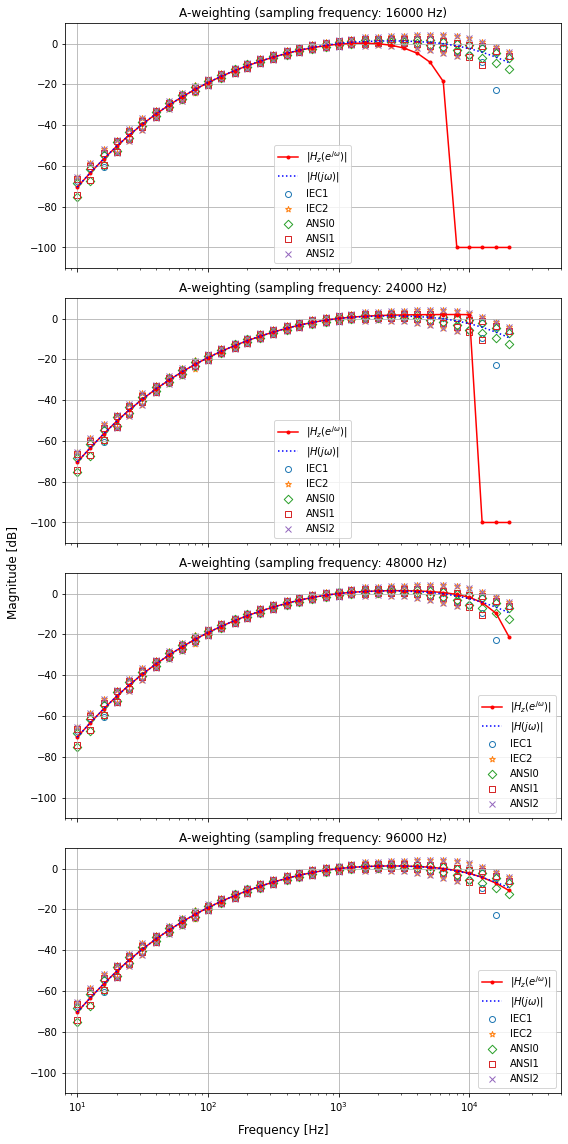

In [5]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharex=True)

for ax, fs in zip(axes, (16000, 24000, 48000, 96000)):
    plot_curve('A', fs, ax)

fig.supxlabel('Frequency [Hz]')
fig.supylabel('Magnitude [dB]')
fig.tight_layout()

### B-weighting

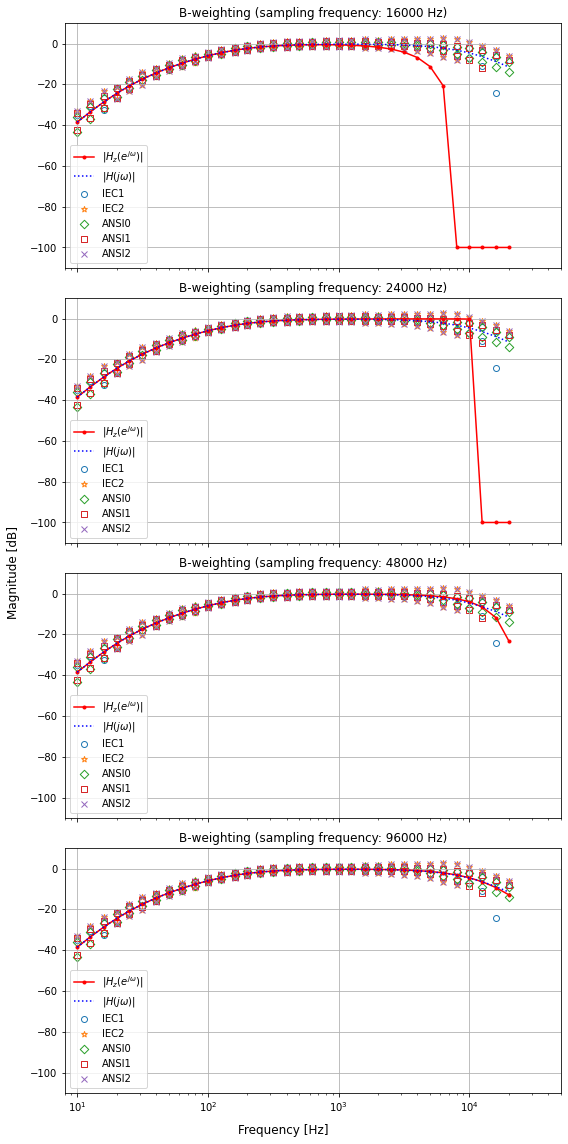

In [6]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharex=True)

for ax, fs in zip(axes, (16000, 24000, 48000, 96000)):
    plot_curve('B', fs, ax)

fig.supxlabel('Frequency [Hz]')
fig.supylabel('Magnitude [dB]')
fig.tight_layout()

### C-weighting

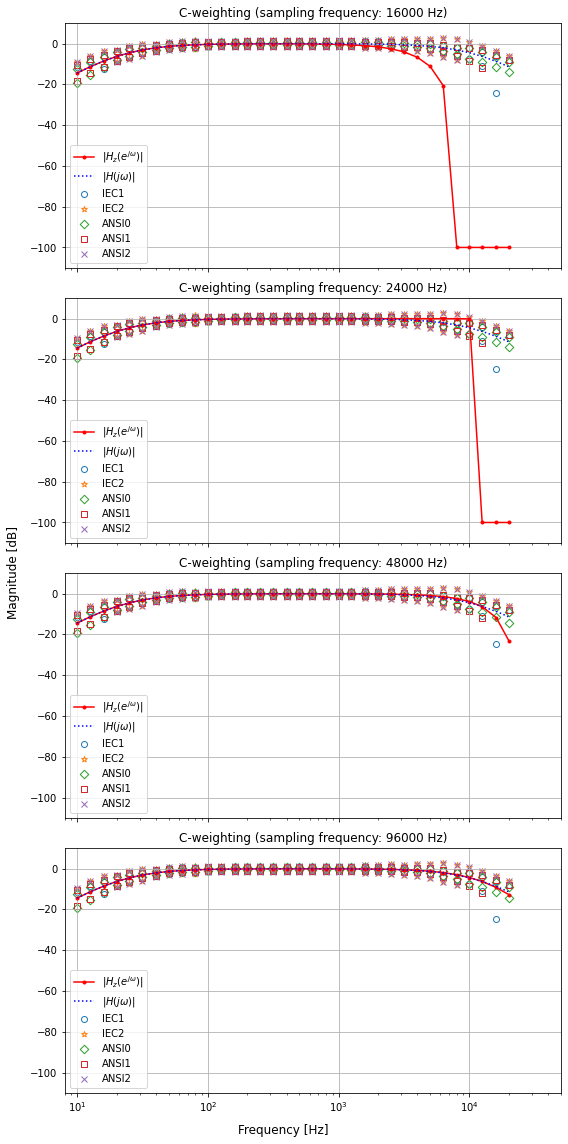

In [7]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharex=True)

for ax, fs in zip(axes, (16000, 24000, 48000, 96000)):
    plot_curve('C', fs, ax)

fig.supxlabel('Frequency [Hz]')
fig.supylabel('Magnitude [dB]')
fig.tight_layout()

### Z-weighting

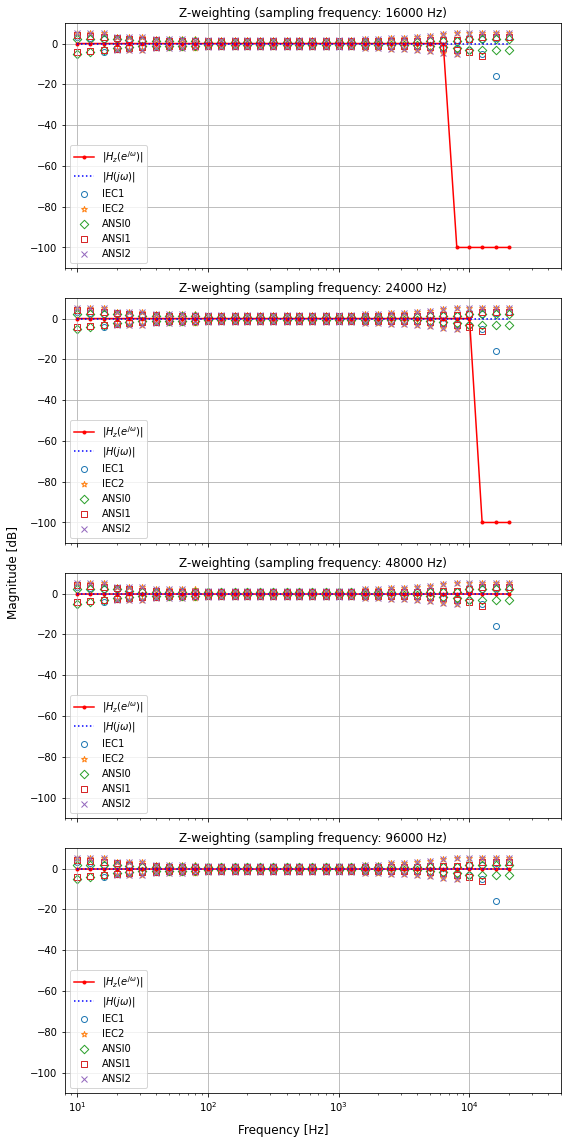

In [8]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharex=True)

for ax, fs in zip(axes, (16000, 24000, 48000, 96000)):
    plot_curve('Z', fs, ax)

fig.supxlabel('Frequency [Hz]')
fig.supylabel('Magnitude [dB]')
fig.tight_layout()

## Fourier transform of a Gaussian noise with A-weighting

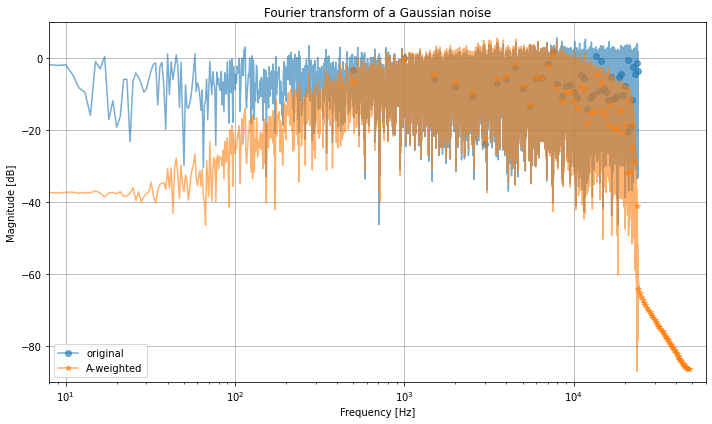

In [9]:
################################################################################
### Configuration
################################################################################
fs_orig = 48_000
fs_weighting = 96_000
weighting = 'A'


################################################################################
### Execution
################################################################################
np.random.seed(0)
x = np.random.randn(fs_orig)
y = weight_wave(x, fs_orig, weighting=weighting, fs_weighting=fs_weighting)

X = np.fft.rfft(x, norm='forward')
Y = np.fft.rfft(y, norm='forward')
X_db = calc_db(X / X[1000], min_db=-100)
Y_db = calc_db(Y / X[1000], min_db=-100)
f_X = np.fft.rfftfreq(x.shape[0], 1/fs_orig)
f_Y = np.fft.rfftfreq(y.shape[0], 1/fs_weighting)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(f_X, X_db, alpha=.6, marker='o', markevery=500,
        label='original')
ax.plot(f_Y, Y_db, alpha=.6, marker='*', markevery=500,
        label=f'{weighting}-weighted')
ax.set(
    title='Fourier transform of a Gaussian noise',
    xlabel='Frequency [Hz]',
    ylabel='Magnitude [dB]',
    xscale='log',
    xlim=(10*0.8, fs_weighting*0.5*1.25),
    ylim=(-90, 10),
)
ax.legend()
ax.grid()
fig.tight_layout()

***

*End*